<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_4_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D0%B8_%D0%A1%D1%82%D1%80%D0%BE%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модули
## Определение и подключение модулей

Модуль в языке Python представляет отдельный файл с кодом, который можно повторно использовать в других программах.

Для создания модуля необходимо создать собственно файл с расширением *.py, который будет представлять модуль. Название файла будет представлять название модуля. Затем в этом файле надо определить одну или несколько функций.

Допустим, основной файл программы называется main.py. И мы хотим подключить к нему внешние модули.

Для этого сначала определим новый модуль: создадим в той же папке, где находится main.py, новый файл, который назовем message.py. По умолчанию интерпретатор Python ищет модули по ряду стандартных путей, один из которых - это папка главного, запускаемого скрипта. Поэтому, чтобы интерпретатор подхватил модуль message.py, для простоты оба файла поместим в один проект.

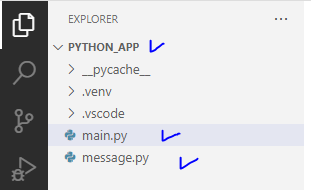

Соответственно модуль будет называться message. Определим в нем следующий код:

In [54]:
hello = "Hello all"


def print_message(text):
    print(f"Message: {text}")

Здесь определена переменная hello и функция print_message, которая в качестве параметра получает некоторый текст и выводит его на консоль.

В основном файле программы - main.py используем данный модуль:

In [56]:
import message      # подключаем модуль message

# выводим значение переменной hello
print(message.hello)        # Hello all
# обращаемся к функии print_message
message.print_message("Hello work")  # Message: Hello work

Hello all
Message: Hello work


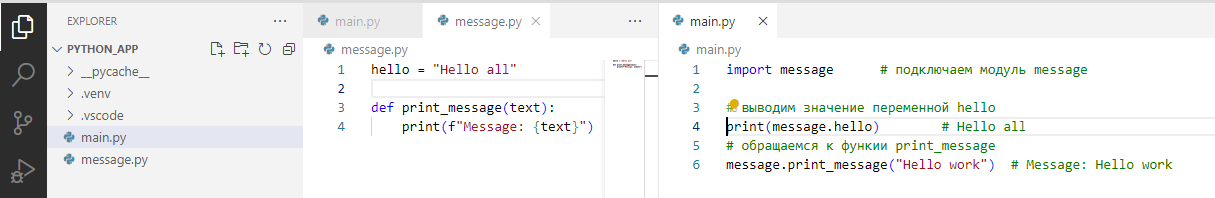

Подключение функциональности модуля в глобальное пространство имен
Другой вариант настройки предполагает импорт функциональности модуля в глобальное пространство имен текущего модуля с помощью ключевого слова from:

In [57]:
from message import print_message

# обращаемся к функии print_message из модуля message
print_message("Hello work")  # Message: Hello work

# переменная hello из модуля message не доступна, так как она не импортирована
# print(message.hello)
# print(hello)

Message: Hello work


Если необходимо импортировать в глобальное пространство имен весь функционал, то вместо названий отдельных функций и переменных можно использовать символ зводочки *:

In [58]:
from message import *

# обращаемся к функции print_message из модуля message
print_message("Hello work")  # Message: Hello work

# обращаемся к переменной hello из модуля message
print(hello)    # Hello all

Message: Hello work
Hello all


Но стоит отметить, что импорт в глобальное пространство имен чреват коллизиями имен функций. Например, если у нас том же файле определена функция с тем же именем до ее вызова, то будет вызываться функция, которая определена последней:

In [59]:
from message import *

print_message("Hello work")  # Message: Hello work - применяется функция из модуля message

def print_message(some_text):
    print(f"Text: {some_text}")

print_message("Hello work")  # Text: Hello work - применяется функция из текущего файла

Message: Hello work
Text: Hello work


## Установка псевдонимов

При импорте модуля и его функциональности мы можем установить для них псевдонимы. Для этого применяется ключевое слово as, после которого указывается псевдоним. Например, установим псевдоним для модуля:

In [60]:
import message as mes  # модуль message проецируется на псевдоним mes

# выводим значение переменной hello
print(mes.hello)        # Hello all
# обращаемся к функии print_message
mes.print_message("Hello work")  # Message: Hello work

Hello all
Message: Hello work


Подобным образом можно установить псевдонимы для отдельной функциональности модуля:

In [61]:
from message import print_message as display
from message import hello as welcome

print(welcome)          # Hello all - переменная hello из модуля message
display("Hello work")   # Message: Hello work - функция print_message из модуля message

Hello all
Message: Hello work


Псевдонимы могут быть полезны, когда нас не устраивают имена функций и переменных, например, они слишком длинные, и мы хотим их сократить, либо мы хотим дать им более описательные, с нашей точки зрения, имена. Либо если в текущем файле уже есть функциональность с теми же именами, и с помощью установки псевдонимов мы можем избежать конфликта имен. Например:

In [62]:
from message import print_message as display

def print_message(some_text):
    print(f"Text: {some_text}")

# функция print_message из модуля message
display("Hello work")       # Message: Hello work

# функция print_message из текущего файла
print_message("Hello work")  # Text: Hello work

Message: Hello work
Text: Hello work


## Имя модуля

В примере выше модуль main.py, который является главным, использует модуль message.py. При запуске модуля main.py программа выполнит всю необходимую работу. Однако, если мы запустим отдельно модуль message.py сам по себе, то ничего на консоли не увидим. Ведь модуль message просто определяет функцию и переменную и не выполняет никаких других действий. Но мы можем сделать так, чтобы модуль message.py мог использоваться как сам по себе, так и подключаться в другие модули.

При выполнении модуля среда определяет его имя и присваивает его глобальной переменной __name__ (с обеих сторон по два подчеркивания). Если модуль является запускаемым, то его имя равно __main__ (также по два подчеркивания с каждой стороны). Если модуль используется в другом модуле, то в момент выполнения его имя аналогично названию файла без расширения py. И мы можем это использовать. Так, изменим содержимое файла message.py:

In [63]:
hello = "Hello all"


def print_message(text):
    print(f"Message: {text}")


def main():
    print_message(hello)


if __name__ == "__main__":
    main()

Message: Hello all


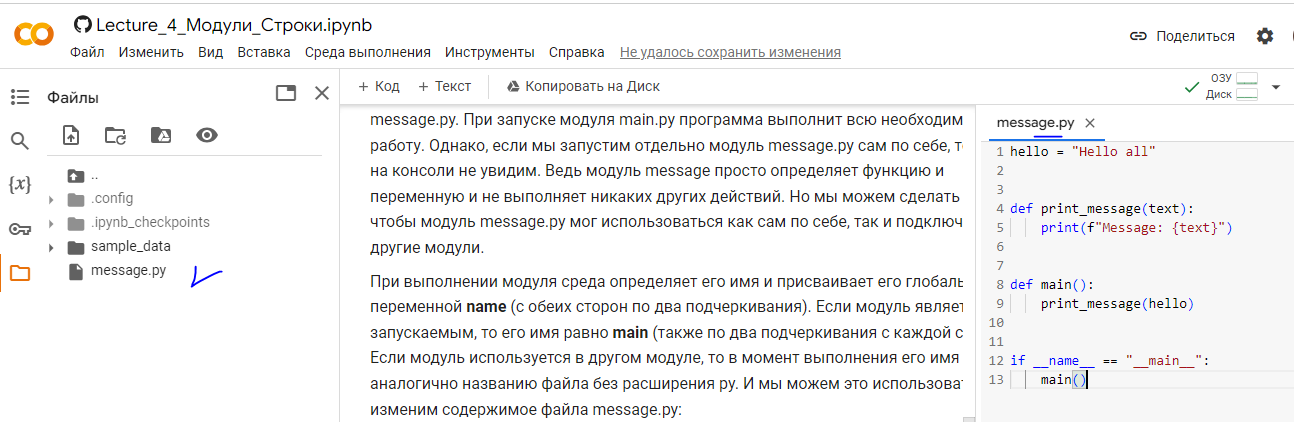

В данном случае в модуль message.py для тестирования функциональности модуля добавлена функция main. И мы можем сразу запустить файл message.py отдельно от всех и протестировать код.

Переменная __name__ указывает на имя модуля. Для главного модуля, который непосредственно запускается, эта переменная всегда будет иметь значение __main__ вне зависимости от имени файла.

Поэтому, если мы будем запускать скрипт message.py отдельно, сам по себе, то Python присвоит переменной __name__ значение __main__, далее в выражении if вызовет функцию main из этого же файла.

Однако если мы будем запускать другой скрипт, а этот - message.py - будем подключать в качестве вспомогательного, для message.py переменная __name__ будет иметь значение message. И соответственно метод main в файле message.py не будет работать.

Данный подход с проверкой имени модуля является более рекомендуемым подходом, чем просто вызов метода main.

В файле main.py также можно сделать проверку на то, является ли модуль главным (хотя в прицнипе это необязательно):

In [64]:
import message


def main():
    message.print_message("Hello work")  # Message: Hello work


if __name__ == "__main__":
    main()

Message: Hello work


Python предоставляет ряд встроенных модулей, которые мы можем использовать в своих программах. В следующих статьях рассмотрим основные из них.

# Генерация байткода модулей

При выполнении скрипта на языке Python все выполнение в общем случае разбивается на две стадии:

* Файл с кодом (файл с расширением .py) компилируется в промежуточный байткод.

*  Далее скомпилированный байткодом интерпретируется, то есть происходит собственно выполнение программы

При этом нам не надо явным образом генерировать никакой байткод, он создается неявно при выполнении скрипта Python. Если программа импортирует внешние модули/библиотеки и они импортируются первый раз, то их скомпилированный байткод сохраняется сохраняется в файле с расширением .pyc и кэшируется в каталоге __pycache__ в папке, где расположен файл с кодом python. Если мы вносим в исходный файл библиотеки изменения, то Python перекомпилирует файл байткода. Если изменений в коде нет, то загружается ранее скомпилированный байткод из файла *.pyc. Это позволяет оптимизировать работу с приложением, быстрее его компилировать и выполнять.

Однако байткод основного скрипта, который представляет основной файл программы и который передается интерпретатору python, не сохраняется в файле *.pyc и перекомпилируется каждый раз при запуске приложения.

Допустим, в папке проекта у нас размещен файл user.py со простейшей функцией, которая принимает два параметра и выводит их значения:

In [65]:
def printUser(username, userage):
    print(f"Name: {username}  Age:{userage}")

Подключим этот файл в главном модуле программы, который пусть называется app.py:

In [66]:
import user
username = "Tom"
userage = 39

user.printUser(username, userage)

Name: Tom  Age:39


При выполнении этого скрипта в папке проекте (где располагается модуль "user.py") будет создан каталог __pycache__. А в нем будет сгенерирован файл байткода, который будет наподобие следующего user.cpython-версия.pyc, где в качестве версии будет применяться версия используемого интерпретатора, например, 311 (для версии Python 3.11). Сгенерированный pyc-файл является бинарным, поэтому текстовом редакторе нет смысла его открывать.

## Ручная компиляция байткода

Хотя файл байткода создается автоматически, мы вручную можем его сгенерировать. Для этого есть несколько способов: компиляция с помощью скрипта py_compile и компиляция с помощью модуля compileall.

Скрипт py_compile применяется для компиляции отдельных файлов. Для компиляции произвольного скрипта user.py в файл с байткодом мы могли бы использовать следующую программу:

In [67]:
import py_compile

py_compile.compile("user.py")   # передаем путь к скрипту

'__pycache__/user.cpython-310.pyc'

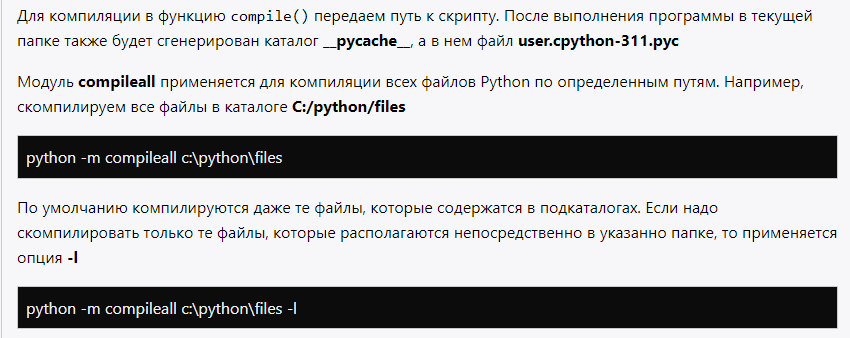

## Модуль random

Модуль random управляет генерацией случайных чисел. Его основные функции:

* random(): генерирует случайное число от 0.0 до 1.0

* randint(): возвращает случайное число из определенного диапазона

* randrange(): возвращает случайное число из определенного набора чисел

* shuffle(): перемешивает список

* choice(): возвращает случайный элемент списка

Функция random() возвращает случайное число с плавающей точкой в промежутке от 0.0 до 1.0. Если же нам необходимо число из большего диапазона, скажем от 0 до 100, то мы можем соответственно умножить результат функции random на 100.

In [68]:
import random

number = random.random()  # значение от 0.0 до 1.0
print(number)
number = random.random() * 100  # значение от 0.0 до 100.0
print(number)

0.36918830858692264
58.558637152203694


Функция randint(min, max) возвращает случайное целое число в промежутке между двумя значениями min и max.

In [69]:
import random

number = random.randint(20, 35)  # значение от 20 до 35
print(number)

26


Функция randrange() возвращает случайное целое число из определенного набора чисел. Она имеет три формы:

* randrange(stop): в качестве набора чисел, из которых происходит извлечение случайного значения, будет использоваться диапазон от 0 до числа stop

* randrange(start, stop): набор чисел представляет диапазон от числа start до числа stop

* randrange(start, stop, step): набор чисел представляет диапазон от числа start до числа stop, при этом каждое число в диапазоне отличается от предыдущего на шаг step

In [70]:
import random

number = random.randrange(10)  # значение от 0 до 10 не включая
print(number)
number = random.randrange(2, 10)  # значение в диапазоне 2, 3, 4, 5, 6, 7, 8, 9
print(number)
number = random.randrange(2, 10, 2)  # значение в диапазоне 2, 4, 6, 8
print(number)

2
7
2


## Работа со списком

Для работы со списками в модуле random определены две функции: функция shuffle() перемешивает список случайным образом, а функция choice() возвращает один случайный элемент из списка:

In [71]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8]
random.shuffle(numbers)
print(numbers)
random_number = random.choice(numbers)
print(random_number)

[4, 6, 2, 8, 3, 5, 1, 7]
2


# Модуль math

Встроенный модуль math в Python предоставляет набор функций для выполнения математических, тригонометрических и логарифмических операций. Некоторые из основных функций модуля:

* pow(num, power): возведение числа num в степень power

* sqrt(num): квадратный корень числа num

* ceil(num): округление числа до ближайшего наибольшего целого

* floor(num): округление числа до ближайшего наименьшего целого

* factorial(num): факториал числа

* degrees(rad): перевод из радиан в градусы

* radians(grad): перевод из градусов в радианы

* cos(rad): косинус угла в радианах

* sin(rad): синус угла в радианах

* tan(rad): тангенс угла в радианах

* acos(rad): арккосинус угла в радианах

* asin(rad): арксинус угла в радианах

* atan(rad): арктангенс угла в радианах

* log(n, base): логарифм числа n по основанию base

* log10(n): десятичный логарифм числа n

Пример применения некоторых функций:

In [72]:
import math

# возведение числа 2 в степень 3
n1 = math.pow(2, 3)
print(n1)  # 8

# ту же самую операцию можно выполнить так
n2 = 2**3
print(n2)

# квадратный корень числа
print(math.sqrt(9))  # 3

# ближайшее наибольшее целое число
print(math.ceil(4.56))  # 5

# ближайшее наименьшее целое число
print(math.floor(4.56))  # 4

# перевод из радиан в градусы
print(math.degrees(3.14159))  # 180

# перевод из градусов в радианы
print(math.radians(180))   # 3.1415.....
# косинус
print(math.cos(math.radians(60)))  # 0.5
# cинус
print(math.sin(math.radians(90)))   # 1.0
# тангенс
print(math.tan(math.radians(0)))    # 0.0

print(math.log(8,2))    # 3.0
print(math.log10(100))    # 2.0

8.0
8
3.0
5
4
179.9998479605043
3.141592653589793
0.5000000000000001
1.0
0.0
3.0
2.0


Также модуль math предоставляет ряд встроенных констант, такие как PI и E:

In [73]:
import math
radius = 30
# площадь круга с радиусом 30
area = math.pi * math.pow(radius, 2)
print(area)

# натуральный логарифм числа 10
number = math.log(10, math.e)
print(number)

2827.4333882308138
2.302585092994046


# Модуль locale

При форматировании чисел Python по умолчанию использует англосаксонскую систему, при которой разряды целого числа отделяются друг от друга запятыми, а дробная часть от целой отделяется точкой. В континентальной Европе, например, используется другая система, при которой разряды разделяются точкой, а дробная и целая часть - запятой:



```
# англосаксонская система
1,234.567
# европейская система
1.234,567
```



И для решения проблемы форматирования под определенную культуру в Python имеется встроенный модуль locale.

Для установки локальной культуры в модуле locale определена функция setlocale(). Она принимает два параметра:


```
setlocale(category, locale)
```



Первый параметр указывает на категорию, к которой применяется функция - к числам, валютам или и числам, и валютам. В качестве значения для параметра мы можем передавать одну из следующих констант:

* LC_ALL: применяет локализацию ко всем категориям - к форматированию чисел, валют, дат и т.д.

* LC_NUMERIC: применяет локализацию к числам

* LC_MONETARY: применяет локализацию к валютам

* LC_TIME: применяет локализацию к датам и времени

*  LC_CTYPE: применяет локализацию при переводе символов в верхний или нижний регистр

*  LC_COLLIATE: применяет локаль при сравнении строк

Второй параметр функции setlocale указывает на локальную культуру, которую надо использовать. На ОС Windows можно использовать код страны по ISO из двух символов, например, для США - "us", для Германии - "de", для России - "ru". Но на MacOS необходимо указывать код языка и код страны, например, для английского в США - "en_US", для немецкого в Германии - "de_DE", для русского в России - "ru_RU". По умолчанию фактически используется культура "en_US".

Непосредственно для форматирования чисел и валют модуль locale предоставляет две функции:

* currency(num): форматирует валюту

* format_string(str, num): подставляет число num вместо плейсхолдера в строку str

Применяются следующие плейсхолдеры:

> * d: для целых чисел
* f: для чисел с плавающей точкой
* e: для экспоненциальной записи чисел

Перед каждым плейсхолдером ставится знак процента %, например:



```
"%d"
```


При выводе дробных чисел перед плейсхолдером после точки можно указать, сколько знаков в дробной части должно отображаться:


```
%.2f        # два знака в дробной части
```




Применим локализацию чисел и валют в немецкой культуре:

In [76]:
import locale

locale.setlocale(locale.LC_ALL, "de_DE")  # для Windows и MacOS

number = 12345.6789
formatted = locale.format_string("%f", number)
print(formatted)  # 12345,678900

formatted = locale.format_string("%.2f", number)
print(formatted)  # 12345,68

formatted = locale.format_string("%d", number)
print(formatted)  # 12345

formatted = locale.format_string("%e", number)
print(formatted)  # 1,234568e+04

money = 234.678
formatted = locale.currency(money)
print(formatted)  # 234,68 €

Error: ignored

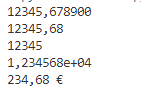

Если вместо конкретного кода в качестве второго параметра передается пустая строка, то Python будет использовать культуру, которая применяется на текущей рабочей машине. А с помощью функции getlocale() можно получить эту культуру:

In [77]:
import locale

locale.setlocale(locale.LC_ALL, "")

number = 12345.6789
formatted = locale.format_string("%.02f", number)
print(formatted)    # 12345,68
print(locale.getlocale())
# ('Russian_Russia', '1251') - Windows
# ('ru_RU', 'UTF-8')  - MacOS

12345.68
('en_US', 'UTF-8')


Стоит отметить, что в зависимости от системы вывод может отличаться.

# Модуль decimal

При работе с числами с плавающей точкой (то есть float) мы сталкиваемся с тем, что в результате вычислений мы получаем не совсем верный результат:

In [78]:
number = 0.1 + 0.1 + 0.1
print(number)       # 0.30000000000000004

0.30000000000000004


Проблему может решить использование функции round(), которая округлит число. Однако есть и другой способ, который заключается в использовании встроенного модуля decimal.

Ключевым компонентом для работы с числами в этом модуле является класс Decimal. Для его применения нам надо создать его объект с помощью конструктора. В конструктор передается строковое значение, которое представляет число:

In [80]:
from decimal import Decimal

number = Decimal("0.1")

print(number)

0.1


После этого объект Decimal можно использовать в арифметических операциях:

In [81]:
from decimal import Decimal

number = Decimal("0.1")
number = number + number + number
print(number)       # 0.3

0.3


В операциях с Decimal можно использовать целые числа:

In [82]:
number = Decimal("0.1")
number = number + 2

print(number)

2.1


Однако нельзя смешивать в операциях дробные числа float и Decimal:

In [83]:
number = Decimal("0.1")
number = number + 0.1   # здесь возникнет ошибка
print(number)

TypeError: ignored

С помощью дополнительных знаков мы можем определить, сколько будет символов в дробной части числа:

In [84]:
number = Decimal("0.10")
number = 3 * number
print(number)       # 0.30

0.30


Строка "0.10" определяет два знака в дробной части, даже если последние символы будут представлять ноль. Соответственно "0.100" представляет три знака в дробной части.

## Округление чисел

Объекты Decimal имеют метод quantize(), который позволяет округлять числа. В этот метод в качестве первого аргумента передается также объект Decimal, который указывает формат округления числа:

In [85]:
from decimal import Decimal

number = Decimal("0.444")
number = number.quantize(Decimal("1.00"))
print(number)       # 0.44

number = Decimal("0.555678")
print(number.quantize(Decimal("1.00")))       # 0.56

number = Decimal("0.999")
print(number.quantize(Decimal("1.00")))       # 1.00

0.44
0.56
1.00


Используемая строка "1.00" указывает, что округление будет идти до двух знаков в дробной части.

По умолчанию округление описывается константой ROUND_HALF_EVEN, при котором округление происходит до ближайшего четного числа, если округляемая часть равна 5. Например:

In [86]:
from decimal import Decimal, ROUND_HALF_EVEN


number = Decimal("10.025")      # 2 - ближайшее четное число
print(number.quantize(Decimal("1.00"), ROUND_HALF_EVEN))       # 10.02

number = Decimal("10.035")      # 4 - ближайшее четное число
print(number.quantize(Decimal("1.00"), ROUND_HALF_EVEN))       # 10.04

10.02
10.04


Стратегия округления передается в качестве второго параметра в quantize.

Строка "1.00" означает, что округление будет идти до двух чисел в дробной части. Но в первом случае "10.025" - вторым знаком идет 2 - четное число, поэтому, несмотря на то, что следующее число 5, двойка не округляется до тройки.

Во втором случае "10.035" - вторым знаком идет 3 - нечетное число, ближайшим четным числом будет 4, поэтому 35 округляется до 40.

Данное поведение при округлении, возможно, не всем покажется желательным, и в этом случае его можно переопределить, использовав одну из следующих констант:

* ROUND_HALF_UP: округляет число в сторону повышения, если после него идет число 5 или выше

* ROUND_HALF_DOWN: округляет число в сторону повышения, если после него идет число больше 5

In [93]:
from decimal import Decimal, ROUND_HALF_DOWN

number = Decimal("10.026")
print(number.quantize(Decimal("1.00"), ROUND_HALF_DOWN))       # 10.03

number = Decimal("10.025")
print(number.quantize(Decimal("1.00"), ROUND_HALF_DOWN))       # 10.02

10.03
10.02


ROUND_05UP: округляет 0 до единицы, если после него идет число 5 и выше

In [92]:
from decimal import Decimal, ROUND_05UP

number = Decimal("10.005")
print(number.quantize(Decimal("1.00"), ROUND_05UP))       # 10.01

number = Decimal("10.025")
print(number.quantize(Decimal("1.00"), ROUND_05UP))       # 10.02

10.01
10.02


ROUND_CEILING: округляет число в большую сторону вне зависимости от того, какое число идет после него

In [91]:
from decimal import Decimal, ROUND_CEILING

number = Decimal("10.021")
print(number.quantize(Decimal("1.00"), ROUND_CEILING))       # 10.03

number = Decimal("10.025")
print(number.quantize(Decimal("1.00"), ROUND_CEILING))       # 10.03

10.03
10.03


ROUND_FLOOR: не округляет число вне зависимости от того, какое число идет после него

In [90]:
from decimal import Decimal, ROUND_FLOOR

number = Decimal("10.021")
print(number.quantize(Decimal("1.00"), ROUND_FLOOR))       # 10.02

number = Decimal("10.025")
print(number.quantize(Decimal("1.00"), ROUND_FLOOR))       # 10.02

10.02
10.02


# Модуль dataclass. Data-классы

Модуль dataclasses предоставляет декоратор dataclass, который позволяет создавать data-классы - подобные позволяют значительно сократить шаблонный код классов. Как правило, такие классы предназначены для хранения некоторого состояния, некоторых данных и когда не требуется какое-то поведение в виде функций.

Рассмотрим простейший пример:

In [94]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

tom = Person("Tom", 38)
print(f"Name: {tom.name}  Age: {tom.age}")      # Name: Tom  Age: 38

Name: Tom  Age: 38


Здесь определен класс Person, у которого в функции конструктора определены два атрибута: name и age. Далее создаем один объект этого класса и выводим значения его атрибутов на консоль.

Теперь изменим эту программу, сделав класс Person data-классом:

In [95]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int

tom = Person("Tom", 38)
print(f"Name: {tom.name}  Age: {tom.age}")      # Name: Tom  Age: 38

Name: Tom  Age: 38


Для создания data-класса импортируем из модуля dataclasses декоратор dataclass и применяем его к классу Person. И в этом случае в самом классе нам уже не надо указывать конструктор - функцию __init__. Мы просто указываем атрибуты. А Python потом сам сгенерирует конструктор, в который также мы можем передать значения для атрибутов объекта.

Таким образом, мы уже сократили определение класса и сделали его более простым. Но генерацией метода __init__ функциональность декоратора dataclass не ограничивается. В реальности data-класс

In [96]:
@dataclass
class Person:
    name: str
    age: int

будет аналогичен следующему:

In [97]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"Person(name={self.name!r}, age={self.age!r}"

    def __eq__(self, other):
        if other.__class__ is self.__class__:
            return (self.name, self.age) == (other.name, other.age)
        return NotImplemented

В данном случае мы видим, что кроме функции __init__, также определяется функция __repr__() для возвращения строкового представления и функция __eq__() для сравнения двух объектов. Применение данных функций:

In [98]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int


tom = Person("Tom", 38)
bob = Person("Bob", 42)
tomas = Person("Tom", 38)
print(tom == tomas)     # True
print(tom == bob)       # False
print(tom)              # Person(name="Tom", age=38)

True
False
Person(name='Tom', age=38)


## Параметры декоратора dataclass

С помощью параметров декоратор dataclass позволяет сгенерировать дополнительный шаблонный код и вообще настроить генерацию кода:



```
def dataclass(cls=None, /, *, init=True, repr=True, eq=True, order=False,
              unsafe_hash=False, frozen=False, match_args=True,
              kw_only=False, slots=False)
```



Рассмотрим базовые параметры:

* init: если равно True, то генерируется функция __init__(). По умолчанию равно True

* repr: если равно True, то генерируется функция __repr__(), которая возвращает строковое представление объекта. По умолчанию равно True

* eq: если равно True, то генерируется функция __eq__(), которая сравнивает два объекта. По умолчанию равно True

* order: если равно True, то генерируются функции __lt__ (операция <), __le__ (<=), __gt__ (>), __ge__ (>=), которые применяются для упорядочивания объектов. По умолчанию равно False

* unsafe_hash: если равно True, то генерируется функция __hash__(), которая возвращает хеш объекта. По умолчанию равно False

Кроме того, те функции, которые создаются по умолчанию, могут быть переопределены.

Применение параметров:

In [100]:
from dataclasses import dataclass

@dataclass(unsafe_hash=True, order=True)
class Person:
    name: str
    age: int
    def __repr__(self):
        return f"Person. Name: {self.name}  Age: {self.age}"


tom = Person("Tom", 38)
print(tom.__hash__())   # -421667297069596717
print(tom)              # Person. Name: Tom  Age: 38

2441618507269098404
Person. Name: Tom  Age: 38


В данном случае включаем генерирование хеша и функций упорядочивания, а также явным образом переопределяем функцию __repr__ для создания строкового представления объекта.

## Значения по умолчанию

При необходимости атрибутам можно присвоить значения по умолчанию, если в конструкторе им не передаются значения:

In [101]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int = 18


tom = Person("Tom", 38)
print(tom)              # Person(name="Tom", age=38)

bob = Person("Bob")
print(bob)              # Person(name="Bob", age=18)

Person(name='Tom', age=38)
Person(name='Bob', age=18)


## Добавление дополнительного функционала

Хотя data-классы предназначены прежде всего для хранения различных данных, но также в них можно определять поведение с помощью дополнительных функций:

In [102]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int

    def say_hello(self):
        print(f"{self.name} says hello")


tom = Person("Tom", 38)
tom.say_hello()     # Tom says hello

Tom says hello


# Строки
## Работа со строками

Строка представляет последовательность символов в кодировке Unicode, заключенных в кавычки. Причем для определения строк Python позволяет использовать как одинарные, так и двойные кавычики:

In [1]:
message = "Hello World!"
print(message)  # Hello World!

name = 'Anna Ilderova'
print(name)  # Anna Ilderova

Hello World!
Anna Ilderova


Если строка длинная, ее можно разбить на части и разместить их на разных строках кода. В этом случае вся строка заключается в круглые скобки, а ее отдельные части - в кавычки:

In [4]:
text = ("Любовь — как море. Ширь ее не знает берегов. "
        " Всю кровь и душу ей отдай: здесь меры нет иной. (Хафиз)")
print(text)

Любовь — как море. Ширь ее не знает берегов.  Всю кровь и душу ей отдай: здесь меры нет иной. (Хафиз)


Если же мы хотим определить многострочный текст, то такой текст заключается в тройные двойные или одинарные кавычки:

In [5]:
text = '''
    Я хотел бы поцеловать тебя.
    А цена этого поцелуя — моя жизнь.
    И теперь моя любовь бежит к моей жизни,
    С криком: «Как дешево, давай купим! (Руми)
'''
print(text)


    Я хотел бы поцеловать тебя. 
    А цена этого поцелуя — моя жизнь.
    И теперь моя любовь бежит к моей жизни,
    С криком: «Как дешево, давай купим! (Руми)



Управляющие последовательности в строке
Строка может содержать ряд специальных символов - управляющих последовательностей или escape-последовательности. Некоторые из них:

* \: позволяет добавить внутрь строки слеш

* \': позволяет добавить внутрь строки одинарную кавычку

* \": позволяет добавить внутрь строки двойную кавычку

* \n: осуществляет переход на новую строку

* \t: добавляет табуляцию (4 отступа)

Используем некоторые последовательностей:

In [6]:
text = "Message:\n\"Hello World\""
print(text)

Message:
"Hello World"


Хотя подобные последовательности могут нам помочь в некоторых делах, например, поместить в строку кавычку, сделать табуляцию, перенос на другую строку. Но они также могут и мешать. Например:

In [7]:
path = "C:\python\name.txt"
print(path)

C:\python
ame.txt


Чтобы избежать подобной ситуации, перед строкой ставится символ r.

In [8]:
path = r"C:\python\name.txt"
print(path)

C:\python\name.txt


## Вставка значений в строку

Python позволяет встравивать в строку значения других переменных. Для этого внутри строки переменные размещаются в фигурных скобках {}, а перед всей строкой ставится символ f:

In [9]:
userName = "Tom"
userAge = 37
user = f"name: {userName}  age: {userAge}"
print(user)   # name: Tom  age: 37

name: Tom  age: 37


## Обращение к символам строки

И мы можем обратиться к отдельным символам строки по индексу в квадратных скобках:

In [10]:
string = "hello world"
c0 = string[0]  # h
print(c0)
c6 = string[6]  # w
print(c6)

c11 = string[11]  # ошибка IndexError: string index out of range
print(c11)

h
w


IndexError: ignored

Чтобы получить доступ к символам, начиная с конца строки, можно использовать отрицательные индексы. Так, индекс -1 будет представлять последний символ, а -2 - предпоследний символ и так далее:

In [11]:
string = "hello world"
c1 = string[-1]  # d
print(c1)
c5 = string[-5]  # w
print(c5)

d
w


При работе с символами следует учитывать, что строка - это неизменяемый (immutable) тип, поэтому если мы попробуем изменить какой-то отдельный символ строки, то мы получим ошибку, как в следующем случае:

In [12]:
string = "hello world"
string[1] = "R"

TypeError: ignored

## Перебор строки

С помощью цикла for можно перебрать все символы строки:

In [13]:
string = "hello world"
for char in string:
    print(char)

h
e
l
l
o
 
w
o
r
l
d


## Получение подстроки


При необходимости мы можем получить из строки не только отдельные символы, но и подстроку. Для этого используется следующий синтаксис:

* string[:end]: извлекается последовательность символов начиная с 0-го индекса по индекс end (не включая)

* string[start:end]: извлекается последовательность символов начиная с индекса start по индекс end (не включая)

* string[start:end:step]: извлекается последовательность символов начиная с индекса start по индекс end (не включая) через шаг step

Используем все варианты получения подстроки:

In [14]:
string = "hello world"

# с 0 до 5 индекса
sub_string1 = string[:5]
print(sub_string1)      # hello

# со 2 до 5 индекса
sub_string2 = string[2:5]
print(sub_string2)      # llo

# с 2 по 9 индекса через один символ
sub_string3 = string[2:9:2]
print(sub_string3)      # lowr

hello
llo
lowr


## Объединение строк

Одной из самых распространенных операций со строками является их объединение или конкатенация. Для объединения строк применяется операция сложения:

In [15]:
name = "Tom"
surname = "Smith"
fullname = name + " " + surname
print(fullname)  # Tom Smith

Tom Smith


С объединением двух строк все просто, но что, если нам надо сложить строку и число? В этом случае необходимо привести число к строке с помощью функции str():

In [16]:
name = "Tom"
age = 33
info = "Name: " + name + " Age: " + str(age)
print(info)  # Name: Tom Age: 33

Name: Tom Age: 33


## Повторение строки

Для повторения строки определенное количество раз применяется операция умножения:

In [17]:
print("a" * 3)  # aaa
print("he" * 4)  # hehehehe

aaa
hehehehe


## Сравнение строк

Особо следует сказать о сравнении строк. При сравнении строк принимается во внимание символы и их регистр. Так, цифровой символ условно меньше, чем любой алфавитный символ. Алфавитный символ в верхнем регистре условно меньше, чем алфавитные символы в нижнем регистре. Например:

In [18]:
str1 = "1a"
str2 = "aa"
str3 = "Aa"
print(str1 > str2)  # False, так как первый символ в str1 - цифра
print(str2 > str3)  # True, так как первый символ в str2 - в нижнем регистре

False
True


Если начальные символы представляют алфавитные символы в одном и том же регистре, то смотрят по алфавиту. Так, "aa" меньше, чем "ba", а "ba" меньше, чем "ca".

Если первые символы одинаковые, в расчет берутся вторые символы при их наличии.

Зависимость от регистра не всегда желательна, так как по сути мы имеем дело с одинаковыми строками. В этом случае перед сравнением мы можем привести обе строки к одному из регистров.

Функция lower() приводит строку к нижнему регистру, а функция upper() - к верхнему.

In [19]:
str1 = "Tom"
str2 = "tom"
print(str1 == str2)  # False - строки не равны

print(str1.lower() == str2.lower())  # True

False
True


## Функции ord и len

Поскольку строка содержит символы Unicode, то с помощью функции ord() мы можем получить числовое значение для символа в кодировке Unicode:

In [20]:
print(ord("A"))     # 65

65


Для получения длины строки можно использовать функцию len():

In [21]:
string = "hello world"
length = len(string)
print(length)   # 11

11


## Поиск в строке

С помощью выражения term in string можно найти подстроку term в строке string. Если подстрока найдена, то выражение вернет значение True, иначе возвращается значение False:

In [22]:
string = "hello world"
exist = "hello" in string
print(exist)    # True

exist = "sword" in string
print(exist)    # False

True
False


# Основные методы строк

Рассмотрим основные методы строк, которые мы можем применить в приложениях:

* isalpha(): возвращает True, если строка состоит только из алфавитных символов

* islower(): возвращает True, если строка состоит только из символов в нижнем регистре

* isupper(): возвращает True, если все символы строки в верхнем регистре

* isdigit(): возвращает True, если все символы строки - цифры

* isnumeric(): возвращает True, если строка представляет собой число

* startswith(str): возвращает True, если строка начинается с подстроки str

* endswith(str): возвращает True, если строка заканчивается на подстроку str

* lower(): переводит строку в нижний регистр

* upper(): переводит строку в вехний регистр

* title(): начальные символы всех слов в строке переводятся в верхний регистр

* capitalize(): переводит в верхний регистр первую букву только самого первого слова строки

* lstrip(): удаляет начальные пробелы из строки

* rstrip(): удаляет конечные пробелы из строки

* strip(): удаляет начальные и конечные пробелы из строки

* ljust(width): если длина строки меньше параметра width, то справа от строки добавляются пробелы, чтобы дополнить значение width, а сама строка выравнивается по левому краю

*  rjust(width): если длина строки меньше параметра width, то слева от строки добавляются пробелы, чтобы дополнить значение width, а сама строка выравнивается по правому краю

* center(width): если длина строки меньше параметра width, то слева и справа от строки равномерно добавляются пробелы, чтобы дополнить значение width, а сама строка выравнивается по центру

*  find(str[, start [, end]): возвращает индекс подстроки в строке. Если подстрока не найдена, возвращается число -1

* replace(old, new[, num]): заменяет в строке одну подстроку на другую

* split([delimeter[, num]]): разбивает строку на подстроки в зависимости от разделителя

* partition(delimeter): разбивает строку по разделителю на три подстроки и возвращает кортеж из трех элементов - подстрока до разделителя, разделитель и подстрока после разделителя

* join(strs): объединяет строки в одну строку, вставляя между ними определенный разделитель

Например, если мы ожидаем ввод с клавиатуры числа, то перед преобразованием введенной строки в число можно проверить, с помощью метода isnumeric() введено ли в действительности число, и если так, то выполнить операцию преобразования:

In [23]:
string = input("Введите число: ")
if string.isnumeric():
    number = int(string)
    print(number)

Введите число: 25
25


Проверка, начинается или оканчивается строка на определенную подстроку:

In [24]:
file_name = "hello.py"

starts_with_hello = file_name.startswith("hello")   # True
ends_with_exe = file_name.endswith("exe")           # False

Удаление пробелов в начале и в конце строки:

In [25]:
string = "   hello  world!  "
string = string.strip()
print(string)           # hello  world!

hello  world!


Дополнение строки пробелами и выравнивание:

In [26]:
print("iPhone 7:", "52000".rjust(10))
print("Huawei P10:", "36000".rjust(10))

iPhone 7:      52000
Huawei P10:      36000


## Поиск в строке
Для поиска подстроки в строке в Python применяется метод find(), который возвращает индекс первого вхождения подстроки в строку и имеет три формы:

* find(str): поиск подстроки str ведется с начала строки до ее конца

* find(str, start): параметр start задает начальный индекс, с которого будет производиться поиск

* find(str, start, end): параметр end задает конечный индекс, до которого будет идти поиск

Если подстрока не найдена, метод возвращает -1:

In [27]:
welcome = "Hello world! Goodbye world!"
index = welcome.find("wor")
print(index)       # 6

# поиск с 10-го индекса
index = welcome.find("wor",10)
print(index)       # 21

# поиск с 10 по 15 индекс
index = welcome.find("wor",10,15)
print(index)       # -1

6
21
-1


## Замена в строке

Для замены в строке одной подстроки на другую применяется метод replace():

* replace(old, new): заменяет подстроку old на new

* replace(old, new, num): параметр num указывает, сколько вхождений подстроки old надо заменить на new. По умолчанию num равно -1, что соответствует первой версии метода и приводит к замене всех вхождений.

In [28]:
phone = "+1-234-567-89-10"

# замена дефисов на пробел
edited_phone = phone.replace("-", " ")
print(edited_phone)     # +1 234 567 89 10

# удаление дефисов
edited_phone = phone.replace("-", "")
print(edited_phone)     # +12345678910

# замена только первого дефиса
edited_phone = phone.replace("-", "", 1)
print(edited_phone)     # +1234-567-89-10

+1 234 567 89 10
+12345678910
+1234-567-89-10


## Разделение на подстроки

Метод split() разбивает строку на список подстрок в зависимости от разделителя. В качестве разделителя может выступать любой символ или последовательность символов. Данный метод имеет следующие формы:

* split(): в качестве разделителя используется пробел

* split(delimeter): в качестве разделителя используется delimeter

* split(delimeter, num): параметр num указывает, сколько вхождений delimeter используется для разделения. Оставшаяся часть строки добавляется в список без разделения на подстроки

In [29]:
text = "Нас трое: ты, я и болезнь. Чью сторону возьмешь, та сторона и победит. (ИБН СИНА)"
# разделение по пробелам
splitted_text = text.split()
print(splitted_text)
print(splitted_text[6])   #Чью

# разбиение по запятым
splitted_text = text.split(",")
print(splitted_text)
print(splitted_text[1])     #  я и болезнь. Чью сторону возьмешь

# разбиение по первым пяти пробелам
splitted_text = text.split(" ", 5)
print(splitted_text)
print(splitted_text[5])     # болезнь. Чью сторону возьмешь, та сторона и победит. (ИБН СИНА)

['Нас', 'трое:', 'ты,', 'я', 'и', 'болезнь.', 'Чью', 'сторону', 'возьмешь,', 'та', 'сторона', 'и', 'победит.', '(ИБН', 'СИНА)']
Чью
['Нас трое: ты', ' я и болезнь. Чью сторону возьмешь', ' та сторона и победит. (ИБН СИНА)']
 я и болезнь. Чью сторону возьмешь
['Нас', 'трое:', 'ты,', 'я', 'и', 'болезнь. Чью сторону возьмешь, та сторона и победит. (ИБН СИНА)']
болезнь. Чью сторону возьмешь, та сторона и победит. (ИБН СИНА)


Еще один метод - partition() разбивает строку по разделителю на три подстроки и возвращает кортеж из трех элементов - подстрока до разделителя, разделитель и подстрока после разделителя:

In [30]:
text = "Движение может заменить множество лекарств, но ни одно лекарство мира не заменит движения."
text_parts = text.partition("лекарств")
print(text_parts)

('Движение может заменить множество ', 'лекарств', ', но ни одно лекарство мира не заменит движения.')


## Соединение строк

При рассмотрении простейших операций со строками было показано, как объединять строки с помощью операции сложения. Другую возможность для соединения строк представляет метод join(): он объединяет список строк. Причем текущая строка, у которой вызывается данный метод, используется в качестве разделителя:

In [31]:
words = ["Let", "me", "speak", "from", "my", "heart", "in", "English"]

# разделитель - пробел
sentence = " ".join(words)
print(sentence)  # Let me speak from my heart in English

# разделитель - вертикальная черта
sentence = " | ".join(words)
print(sentence)  # Let | me | speak | from | my | heart | in | English

Let me speak from my heart in English
Let | me | speak | from | my | heart | in | English


Вместо списка в метод join можно передать простую строку, тогда разделитель будет вставляться между символами этой строки:

In [32]:
word = "hello"
joined_word = "|".join(word)
print(joined_word)      # h|e|l|l|o

h|e|l|l|o


# Форматирование

В прошлых темах было рассмотрено, как можно вставлять в строку некоторые значения, предваряя строку символом f:

In [33]:
first_name="Tom"
text = f"Hello, {first_name}."
print(text)     # Hello, Tom.

name="Bob"
age=23
info = f"Name: {name}\t Age: {age}"
print(info)     # Name: Bob  Age: 23

Hello, Tom.
Name: Bob	 Age: 23


Но также в Python есть альтернативный способ, который предоставляет метод format(). Этот метод позволяет форматировать строку, вставляя в нее на место плейсхолдеров определенные значения.

Для вставки в строку используются специальные параметры, которые обрамляются фигурными скобками ({}).



## Именованные параметры

В форматируемой строке мы можем определять параметры, в методе format() передавать для этих параметров значения:

In [34]:
text = "Hello, {first_name}.".format(first_name="Tom")
print(text)     # Hello, Tom.

info = "Name: {name}\t Age: {age}".format(name="Bob", age=23)
print(info)     # Name: Bob  Age: 23

Hello, Tom.
Name: Bob	 Age: 23


## Параметры по позиции

Мы также можем последовательно передавать в метод format набор аргументов, а в самой форматируемой строке вставлять эти аргумента, указывая в фигурных скобках их номер (нумерация начинается с нуля):

In [35]:
info = "Name: {0}\t Age: {1}".format("Bob", 23)
print(info)     # Name: Bob  Age: 23

Name: Bob	 Age: 23


При этом аргументы можно вставлять в строку множество раз:

In [36]:
text = "Hello, {0} {0} {0}.".format("Tom")
print(text)

Hello, Tom Tom Tom.


## Подстановки

Еще один способ передачи форматируемых значений в строку представляет использование подстановок или специальных плейсхолдеров, на место которых вставляются определенные значения. Для форматирования мы можем использовать следующие плейсхолдеры:

* s: для вставки строк

* d: для вставки целых чисел

* f: для вставки дробных чисел. Для этого типа также можно определить через точку количество знаков в дробной части.

* %: умножает значение на 100 и добавляет знак процента

* e: выводит число в экспоненциальной записи

Общий синтаксис плейсхолдера следующий:



```
{:плейсхолдер}
```



В зависимости от плейсхолдера можно добавлять дополнительные параметры. Например, для форматирования чисел float можно использовать следующие параметры



```
{:[количество_символов][запятая][.число_знаков_в_дробной_части] плейсхолдер}
```



При вызове метода format в него в качестве аргументов передаются значения, которые вставляются на место плейсхолдеров:



In [37]:
welcome = "Hello {:s}"
name = "Tom"
formatted_welcome = welcome.format(name)
print(formatted_welcome)        # Hello Tom

Hello Tom


В качестве результата метод format() возвращает новую отформатированную строку.

Форматирование целых чисел:

In [38]:
source = "{:d} символов"
number = 5
target = source.format(number)
print(target)   # 5 символов

5 символов


Если форматируемое число больше 999, то мы можем указать в определении плейсхолдера, что мы хотим использовать запятую в качестве разделителя разрядов:

In [39]:
source = "{:,d} символов"
print(source.format(5000))   # 5,000 символов

5,000 символов


Причем плейсхолдеры можно использовать и в f-строках:

In [40]:
n = 5000
source = f"{n:,d} символов"
print(source)   # 5,000 символов

5,000 символов


Для дробных чисел, то есть таких, которые представляют тип float, перед кодом плейсхолдера после точки можно указать, сколько знаков в дробной части мы хотим вывести:

In [41]:
number = 23.8589578
print("{:.2f}".format(number))   # 23.86
print("{:.3f}".format(number))   # 23.859
print("{:.4f}".format(number))   # 23.8590
print("{:,.2f}".format(10001.23554))    # 10,001.24

23.86
23.859
23.8590
10,001.24


Еще один параметр позволяет установить минимальную ширину форматируемого значения в символах:

In [42]:
print("{:10.2f}".format(23.8589578))    #     23.86
print("{:8d}".format(25))               #      25

     23.86
      25


Аналогичный пример с f-строками:

In [43]:
n1 = 23.8589578
print(f"{n1:10.2f}")    #     23.86
n2 = 25
print(f"{n2:8d}")       #      25

     23.86
      25


Для вывода процентов лучше воспользоваться кодом "%":

In [44]:
number = .12345
print("{:%}".format(number))        # 12.345000%
print("{:.0%}".format(number))      # 12%
print("{:.1%}".format(number))      # 12.3%

print(f"{number:%}")        # 12.345000%
print(f"{number:.0%}")      # 12%
print(f"{number:.1%}")      # 12.3%

12.345000%
12%
12.3%
12.345000%
12%
12.3%


Для вывода числа в экспоненциальной записи применяется плейсхолдер "e":

In [45]:
number = 12345.6789
print("{:e}".format(number))        # 1.234568e+04
print("{:.0e}".format(number))      # 1e+04
print("{:.1e}".format(number))      # 1.2e+04

print(f"{number:e}")        # 1.234568e+04
print(f"{number:.0e}")      # 1e+04
print(f"{number:.1e}")      # 1.2e+04

1.234568e+04
1e+04
1.2e+04
1.234568e+04
1e+04
1.2e+04


## Форматирование без метода format

Существует также еще один способ форматирования с помощью следующего синтаксиса:


```
строка%(параметр1, параметр2,..параметрN)
```



То есть в начале идет строка, которая содержит те же плейсхолдеры, которые были рассмотрены выше (за исключением плейсхолдера %), после строки ставится знак процента %, а затем список значений, которые вставляются в строку. Фактически знак процента представляют операцию, в результате которой образуется новая строка:

In [46]:
info = "Имя: %s \t Возраст: %d" % ("Tom", 35)
print(info)   # Имя: Tom     Возраст: 35

Имя: Tom 	 Возраст: 35


Рядом с плейсхолдером указывается знак процента и в отличие от функции format здесь не требуются фигурные скобки.

Причем способы форматирования чисел здесь также применяются:

In [47]:
number = 23.8589578
print("%0.2f  - %e" % (number, number))   # 23.86  - 2.385896e+01

23.86  - 2.385896e+01


# Примеры

1. Форматирование строк:

In [48]:
name = "Alice"
age = 25
formatted_text = f"My name is {name} and I am {age} years old."
print(formatted_text)

My name is Alice and I am 25 years old.


2. Поиск подстроки:

In [49]:
text = "Чем меньше женщину мы любим, Тем легче нравимся мы ей. (Пушкин)"
position = text.find("женщину")  # Поиск позиции подстроки "женщину"
print(position)

11


3. Напишите программу, которая определяет, является ли строка палиндромом (читается одинаково в обоих направлениях).

In [50]:
def is_palindrome(s):
    # Удаляем пробелы из строки и приводим к нижнему регистру
    s = s.replace(" ", "").lower()
    # Проверяем, является ли строка равной своему обратному порядку
    return s == s[::-1]

# Пример использования функции
input_string = "А роза упала на лапу Азора"
result = is_palindrome(input_string)
print(f"The input string is a palindrome: {result}")

The input string is a palindrome: True


4. Реализуй программу шифрования и дешифрования с помощью метода Цезаря.

In [53]:
def caesar_cipher_encrypt(text, shift):
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            shift_amount = shift % 32  # учитываем возможное переполнение алфавита
            if char.islower():
                encrypted_text += chr((ord(char) - ord('а') + shift_amount) % 32 + ord('а'))
            else:
                encrypted_text += chr((ord(char) - ord('А') + shift_amount) % 32 + ord('А'))
        else:
            encrypted_text += char
    return encrypted_text

def caesar_cipher_decrypt(text, shift):
    return caesar_cipher_encrypt(text, -shift)  # дешифрование - это шифрование с отрицательным сдвигом

# Пример использования шифрования
message = "Я был готов любить весь мир, - меня никто не понял: и я выучился ненавидеть. (Лермонтов)"
shift_amount = 3
encrypted_message = caesar_cipher_encrypt(message, shift_amount)
print("Encrypted:", encrypted_message)

# Пример использования дешифрования
decrypted_message = caesar_cipher_decrypt(encrypted_message, shift_amount)
print("Decrypted:", decrypted_message)


Encrypted: В дюо жсхсе обдлхя еифя плу, - пирв рлнхс ри тсрво: л в еюцълофв риргелзихя. (Оиупсрхсе)
Decrypted: Я был готов любить весь мир, - меня никто не понял: и я выучился ненавидеть. (Лермонтов)
